In [1]:
import pandas as pd
import numpy  as np
from sqlalchemy import create_engine 
import  seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r'c:\Users\zig53\Desktop\Investic\Pie_Heatmap_anomaly\SET_Data_from1970-2021.csv' , index_col  = 'Date' , parse_dates =  True)
df.columns = df.columns.str.lower()

In [20]:
df.head()

,symbol,open,high,low,close,volume
Date,,,,,,
1975-04-30,SET,100.00,100.00,100.00,100.00,163310
1975-05-02,SET,99.96,99.96,99.96,99.96,150220
1975-05-06,SET,99.53,99.53,99.53,99.53,260100
1975-05-07,SET,99.13,99.13,99.13,99.13,35480
1975-05-08,SET,97.88,97.88,97.88,97.88,52500


In [31]:
df['return'] = df['open'].pct_change()
df['last_2_day_return'] = df['return'].shift(2)
df =  df.dropna()
df['up_up'] = (df['last_2_day_return'] > 0) > ( df['return'] > 0 )
df['up_down'] = (df['last_2_day_return'] > 0) > ( df['return'] < 0 )
df['down_up'] = (df['last_2_day_return'] < 0) > ( df['return'] > 0 )
df['down_down'] = (df['last_2_day_return'] < 0) > ( df['return'] < 0 )
pie_df = df.loc[ : , df.columns.str.contains('up|down')]

In [36]:
pie_df_anm = (pie_df.sum() / len(pie_df))
pie_df_anm


up_up        0.240462
up_down      0.278439
down_up      0.239062
down_down    0.241337
dtype: float64

In [38]:
import plotly.express as  px

px.pie( values = pie_df_anm , names = ['up_up' , 'up_down' , 'down_up' , 'down_down' ]  )

In [39]:
hm = df[['close']].resample( 'M' ).last().pct_change(2).dropna()
hm.index = pd.to_datetime( hm.index )

hm['year'] =  hm.index.year
hm['month'] = hm.index.month

hmd = hm.pivot( index = 'year'   , columns = 'month'  , values = 'close')

<AxesSubplot:xlabel='month', ylabel='year'>

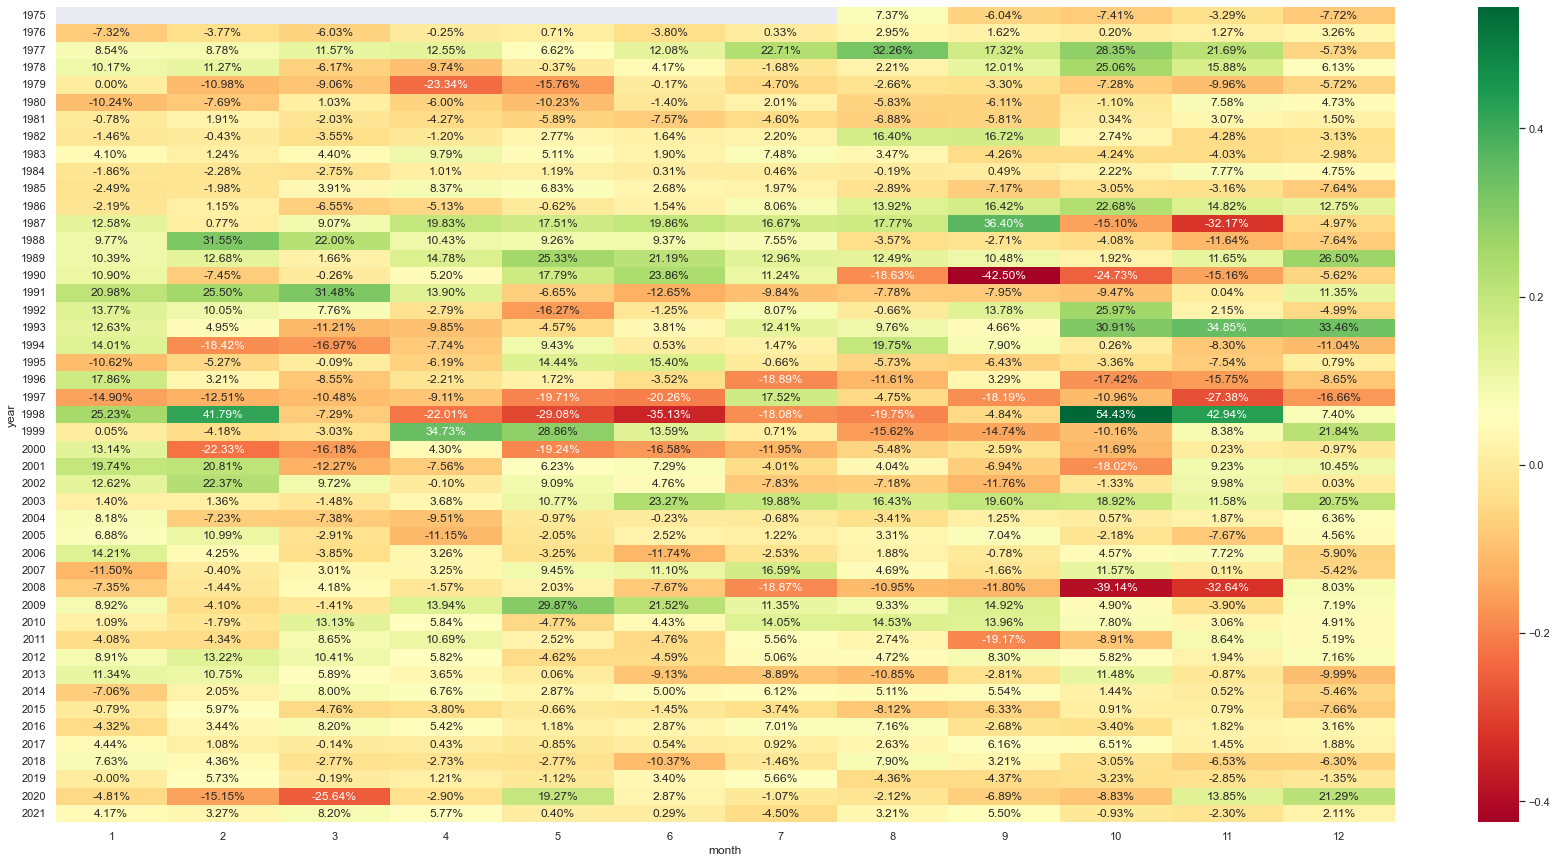

In [46]:
sns.set()
plt.figure(figsize = ( 30 , 15 ) )
sns.heatmap( hmd , annot = True , cmap = "RdYlGn"  , fmt = '.2%')